# Collect Tweets into MongoDB

## Install Python libraries

You may need to restart your Jupyter Notebook instance after installed those libraries.

In [1]:
!pip install pymongo

You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [2]:
!pip install pymongo[srv]

You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [3]:
!pip install dnspython

You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [4]:
!pip install tweepy

You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [5]:
!pip install twitter

You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


## Import Python libraries

In [6]:
import pymongo
from pymongo import MongoClient
import json
import tweepy
import twitter
from pprint import pprint
import configparser
import pandas as pd

##  Load the Authorization Info

Save database connection info and API Keys in a config.ini file and use the configparse to load the authorization info. 

In [7]:
config = configparser.ConfigParser()
config.read('config.ini')

CONSUMER_KEY      = config['mytwitter']['api_key']
CONSUMER_SECRET   = config['mytwitter']['api_secret']
OAUTH_TOKEN       = config['mytwitter']['access_token']
OATH_TOKEN_SECRET = config['mytwitter']['access_secret']

mongod_connect = config['mymongo']['connection']

## Connect to the MongoDB Cluster

In [8]:
client = MongoClient(mongod_connect)
db = client.gp20 # use or create a database named demo
tweet_collection = db.final_project #use or create a collection named tweet_collection
tweet_collection.create_index([("id", pymongo.ASCENDING)],unique = True) # make sure the collected tweets are unique

'id_1'

## Use the Streaming API to Collect Tweets

Authorize the Stream API 

In [4]:
stream_auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
stream_auth.set_access_token(OAUTH_TOKEN, OATH_TOKEN_SECRET)

strem_api = tweepy.API(stream_auth)

Define the query for the Stream API

In [5]:
track = ['election'] # define the keywords, tweets contain election

locations = [-78.9326449,38.4150904,-78.8816972,38.4450731] #defin the location, in Harrisonburg, VA

The collected tweets will contain 'election' <span style="color:red;font-weight:bold"> OR </span> are located in Harrisonburg, VA

In [ ]:
class MyStreamListener(tweepy.StreamListener):
    def on_status(self, status):
        print (status.id_str)
        try:
            tweet_collection.insert_one(status._json)
        except:
            pass
  
    def on_error(self, status_code):
        if status_code == 420:
            #returning False in on_data disconnects the stream
            return False
myStreamListener = MyStreamListener()
myStream = tweepy.Stream(auth = strem_api.auth, listener=myStreamListener)
myStream.filter(track=track)#  (locations = locations)   #Use either track or locations

## Use the REST API to Collect Tweets

Authorize the REST API 

In [9]:
rest_auth = twitter.oauth.OAuth(OAUTH_TOKEN,OATH_TOKEN_SECRET,CONSUMER_KEY,CONSUMER_SECRET)
rest_api = twitter.Twitter(auth=rest_auth)

Define the query for the REST API

In [10]:
count = 100 #number of returned tweets, default and max is 100
geocode = "45.542627,-122.7947541,150mi"  # defin the location, in Portland, OR
q = "covid19"                               #define the keywords, tweets contain covid19

The collected tweets will contain 'election' <span style="color:red;font-weight:bold"> AND </span> are located in Harrisonburg, VA

In [11]:
search_results = rest_api.search.tweets( count=count,q=q, geocode=geocode) #you can use both q and geocode
statuses = search_results["statuses"]
since_id_new = statuses[-1]['id']
for statuse in statuses:
    try:
        tweet_collection.insert_one(statuse)
        pprint(statuse['created_at'])# print the date of the collected tweets
    except:
        pass

'Sun Dec 13 23:26:32 +0000 2020'
'Sun Dec 13 23:25:21 +0000 2020'
'Sun Dec 13 23:20:39 +0000 2020'
'Sun Dec 13 23:18:49 +0000 2020'
'Sun Dec 13 23:18:44 +0000 2020'
'Sun Dec 13 23:16:20 +0000 2020'
'Sun Dec 13 23:16:19 +0000 2020'
'Sun Dec 13 23:00:00 +0000 2020'
'Sun Dec 13 22:56:09 +0000 2020'
'Sun Dec 13 22:50:39 +0000 2020'
'Sun Dec 13 22:49:57 +0000 2020'
'Sun Dec 13 22:45:22 +0000 2020'
'Sun Dec 13 22:44:59 +0000 2020'
'Sun Dec 13 22:38:54 +0000 2020'
'Sun Dec 13 22:36:25 +0000 2020'
'Sun Dec 13 22:34:59 +0000 2020'
'Sun Dec 13 22:29:58 +0000 2020'
'Sun Dec 13 22:28:23 +0000 2020'
'Sun Dec 13 22:27:35 +0000 2020'
'Sun Dec 13 22:27:11 +0000 2020'
'Sun Dec 13 22:26:21 +0000 2020'
'Sun Dec 13 22:25:36 +0000 2020'
'Sun Dec 13 22:24:22 +0000 2020'
'Sun Dec 13 22:22:01 +0000 2020'
'Sun Dec 13 22:20:38 +0000 2020'
'Sun Dec 13 22:18:36 +0000 2020'
'Sun Dec 13 22:18:33 +0000 2020'
'Sun Dec 13 22:18:32 +0000 2020'
'Sun Dec 13 22:09:40 +0000 2020'
'Sun Dec 13 22:07:48 +0000 2020'
'Sun Dec 1

Continue fetching early tweets with the same query. 
<p><span style="color:red;font-weight:bold">YOU WILL REACH YOUR RATE LIMIT VERY FAST</span></p>

In [12]:
since_id_old = 0
while(since_id_new != since_id_old):
    since_id_old = since_id_new
    search_results = rest_api.search.tweets( count=count,q=q,
                        geocode=geocode, max_id= since_id_new)
    statuses = search_results["statuses"]
    since_id_new = statuses[-1]['id']
    for statuse in statuses:
        try:
            tweet_collection.insert_one(statuse)
            pprint(statuse['created_at']) # print the date of the collected tweets
        except:
            pass

'Sun Dec 13 20:34:11 +0000 2020'
'Sun Dec 13 20:29:43 +0000 2020'
'Sun Dec 13 20:29:28 +0000 2020'
'Sun Dec 13 20:25:13 +0000 2020'
'Sun Dec 13 20:24:56 +0000 2020'
'Sun Dec 13 20:23:37 +0000 2020'
'Sun Dec 13 20:23:37 +0000 2020'
'Sun Dec 13 20:23:27 +0000 2020'
'Sun Dec 13 20:21:54 +0000 2020'
'Sun Dec 13 20:19:26 +0000 2020'
'Sun Dec 13 20:18:57 +0000 2020'
'Sun Dec 13 20:18:40 +0000 2020'
'Sun Dec 13 20:17:43 +0000 2020'
'Sun Dec 13 20:16:11 +0000 2020'
'Sun Dec 13 20:15:58 +0000 2020'
'Sun Dec 13 20:14:37 +0000 2020'
'Sun Dec 13 20:14:29 +0000 2020'
'Sun Dec 13 20:13:47 +0000 2020'
'Sun Dec 13 20:13:45 +0000 2020'
'Sun Dec 13 20:13:41 +0000 2020'
'Sun Dec 13 20:13:35 +0000 2020'
'Sun Dec 13 20:13:21 +0000 2020'
'Sun Dec 13 20:12:02 +0000 2020'
'Sun Dec 13 20:10:23 +0000 2020'
'Sun Dec 13 20:08:05 +0000 2020'
'Sun Dec 13 20:06:59 +0000 2020'
'Sun Dec 13 20:06:53 +0000 2020'
'Sun Dec 13 20:06:24 +0000 2020'
'Sun Dec 13 20:05:18 +0000 2020'
'Sun Dec 13 19:58:57 +0000 2020'
'Sun Dec 1

'Sun Dec 13 07:21:14 +0000 2020'
'Sun Dec 13 07:19:56 +0000 2020'
'Sun Dec 13 07:19:38 +0000 2020'
'Sun Dec 13 07:18:42 +0000 2020'
'Sun Dec 13 07:11:11 +0000 2020'
'Sun Dec 13 07:06:46 +0000 2020'
'Sun Dec 13 07:05:33 +0000 2020'
'Sun Dec 13 07:04:59 +0000 2020'
'Sun Dec 13 06:59:47 +0000 2020'
'Sun Dec 13 06:58:21 +0000 2020'
'Sun Dec 13 06:57:03 +0000 2020'
'Sun Dec 13 06:55:58 +0000 2020'
'Sun Dec 13 06:48:27 +0000 2020'
'Sun Dec 13 06:44:45 +0000 2020'
'Sun Dec 13 06:41:20 +0000 2020'
'Sun Dec 13 06:39:56 +0000 2020'
'Sun Dec 13 06:39:42 +0000 2020'
'Sun Dec 13 06:35:14 +0000 2020'
'Sun Dec 13 06:34:30 +0000 2020'
'Sun Dec 13 06:24:50 +0000 2020'
'Sun Dec 13 06:23:59 +0000 2020'
'Sun Dec 13 06:17:34 +0000 2020'
'Sun Dec 13 06:15:22 +0000 2020'
'Sun Dec 13 06:08:07 +0000 2020'
'Sun Dec 13 06:07:19 +0000 2020'
'Sun Dec 13 06:05:05 +0000 2020'
'Sun Dec 13 06:00:53 +0000 2020'
'Sun Dec 13 05:57:44 +0000 2020'
'Sun Dec 13 05:52:23 +0000 2020'
'Sun Dec 13 05:52:09 +0000 2020'
'Sun Dec 1

'Sat Dec 12 19:55:01 +0000 2020'
'Sat Dec 12 19:52:25 +0000 2020'
'Sat Dec 12 19:37:00 +0000 2020'
'Sat Dec 12 19:35:29 +0000 2020'
'Sat Dec 12 19:32:18 +0000 2020'
'Sat Dec 12 19:30:19 +0000 2020'
'Sat Dec 12 19:27:51 +0000 2020'
'Sat Dec 12 19:26:24 +0000 2020'
'Sat Dec 12 19:26:10 +0000 2020'
'Sat Dec 12 19:22:08 +0000 2020'
'Sat Dec 12 19:21:52 +0000 2020'
'Sat Dec 12 19:20:51 +0000 2020'
'Sat Dec 12 19:19:00 +0000 2020'
'Sat Dec 12 19:18:47 +0000 2020'
'Sat Dec 12 19:18:36 +0000 2020'
'Sat Dec 12 19:16:51 +0000 2020'
'Sat Dec 12 19:16:30 +0000 2020'
'Sat Dec 12 19:14:03 +0000 2020'
'Sat Dec 12 19:10:31 +0000 2020'
'Sat Dec 12 19:06:46 +0000 2020'
'Sat Dec 12 19:05:23 +0000 2020'
'Sat Dec 12 19:02:51 +0000 2020'
'Sat Dec 12 19:01:36 +0000 2020'
'Sat Dec 12 19:00:40 +0000 2020'
'Sat Dec 12 19:00:30 +0000 2020'
'Sat Dec 12 18:59:28 +0000 2020'
'Sat Dec 12 18:58:24 +0000 2020'
'Sat Dec 12 18:58:16 +0000 2020'
'Sat Dec 12 18:56:40 +0000 2020'
'Sat Dec 12 18:56:38 +0000 2020'
'Sat Dec 1

'Sat Dec 12 11:04:03 +0000 2020'
'Sat Dec 12 11:03:02 +0000 2020'
'Sat Dec 12 11:01:35 +0000 2020'
'Sat Dec 12 10:48:17 +0000 2020'
'Sat Dec 12 10:44:54 +0000 2020'
'Sat Dec 12 10:43:50 +0000 2020'
'Sat Dec 12 10:39:43 +0000 2020'
'Sat Dec 12 10:33:14 +0000 2020'
'Sat Dec 12 10:32:29 +0000 2020'
'Sat Dec 12 10:29:19 +0000 2020'
'Sat Dec 12 10:23:51 +0000 2020'
'Sat Dec 12 10:23:07 +0000 2020'
'Sat Dec 12 10:20:39 +0000 2020'
'Sat Dec 12 10:20:38 +0000 2020'
'Sat Dec 12 10:19:53 +0000 2020'
'Sat Dec 12 10:17:49 +0000 2020'
'Sat Dec 12 10:16:13 +0000 2020'
'Sat Dec 12 10:14:44 +0000 2020'
'Sat Dec 12 10:13:20 +0000 2020'
'Sat Dec 12 10:13:15 +0000 2020'
'Sat Dec 12 10:13:03 +0000 2020'
'Sat Dec 12 10:11:37 +0000 2020'
'Sat Dec 12 10:10:57 +0000 2020'
'Sat Dec 12 10:10:47 +0000 2020'
'Sat Dec 12 10:07:34 +0000 2020'
'Sat Dec 12 10:03:14 +0000 2020'
'Sat Dec 12 10:02:59 +0000 2020'
'Sat Dec 12 10:02:10 +0000 2020'
'Sat Dec 12 10:01:39 +0000 2020'
'Sat Dec 12 09:59:07 +0000 2020'
'Sat Dec 1

'Sat Dec 12 04:46:31 +0000 2020'
'Sat Dec 12 04:46:22 +0000 2020'
'Sat Dec 12 04:44:50 +0000 2020'
'Sat Dec 12 04:43:39 +0000 2020'
'Sat Dec 12 04:42:07 +0000 2020'
'Sat Dec 12 04:41:42 +0000 2020'
'Sat Dec 12 04:41:29 +0000 2020'
'Sat Dec 12 04:41:19 +0000 2020'
'Sat Dec 12 04:40:28 +0000 2020'
'Sat Dec 12 04:40:16 +0000 2020'
'Sat Dec 12 04:40:02 +0000 2020'
'Sat Dec 12 04:38:06 +0000 2020'
'Sat Dec 12 04:38:06 +0000 2020'
'Sat Dec 12 04:37:10 +0000 2020'
'Sat Dec 12 04:36:45 +0000 2020'
'Sat Dec 12 04:35:27 +0000 2020'
'Sat Dec 12 04:35:05 +0000 2020'
'Sat Dec 12 04:35:00 +0000 2020'
'Sat Dec 12 04:34:58 +0000 2020'
'Sat Dec 12 04:34:51 +0000 2020'
'Sat Dec 12 04:34:40 +0000 2020'
'Sat Dec 12 04:34:32 +0000 2020'
'Sat Dec 12 04:34:09 +0000 2020'
'Sat Dec 12 04:33:37 +0000 2020'
'Sat Dec 12 04:33:21 +0000 2020'
'Sat Dec 12 04:33:06 +0000 2020'
'Sat Dec 12 04:33:05 +0000 2020'
'Sat Dec 12 04:33:02 +0000 2020'
'Sat Dec 12 04:32:42 +0000 2020'
'Sat Dec 12 04:32:32 +0000 2020'
'Sat Dec 1

'Sat Dec 12 03:13:16 +0000 2020'
'Sat Dec 12 03:13:15 +0000 2020'
'Sat Dec 12 03:13:01 +0000 2020'
'Sat Dec 12 03:12:54 +0000 2020'
'Sat Dec 12 03:12:17 +0000 2020'
'Sat Dec 12 03:11:53 +0000 2020'
'Sat Dec 12 03:11:39 +0000 2020'
'Sat Dec 12 03:11:39 +0000 2020'
'Sat Dec 12 03:11:38 +0000 2020'
'Sat Dec 12 03:11:15 +0000 2020'
'Sat Dec 12 03:10:40 +0000 2020'
'Sat Dec 12 03:10:27 +0000 2020'
'Sat Dec 12 03:10:19 +0000 2020'
'Sat Dec 12 03:09:43 +0000 2020'
'Sat Dec 12 03:09:26 +0000 2020'
'Sat Dec 12 03:09:17 +0000 2020'
'Sat Dec 12 03:09:17 +0000 2020'
'Sat Dec 12 03:08:47 +0000 2020'
'Sat Dec 12 03:08:41 +0000 2020'
'Sat Dec 12 03:08:29 +0000 2020'
'Sat Dec 12 03:08:07 +0000 2020'
'Sat Dec 12 03:08:01 +0000 2020'
'Sat Dec 12 03:07:58 +0000 2020'
'Sat Dec 12 03:07:42 +0000 2020'
'Sat Dec 12 03:07:36 +0000 2020'
'Sat Dec 12 03:07:27 +0000 2020'
'Sat Dec 12 03:07:07 +0000 2020'
'Sat Dec 12 03:06:53 +0000 2020'
'Sat Dec 12 03:06:50 +0000 2020'
'Sat Dec 12 03:06:49 +0000 2020'
'Sat Dec 1

'Sat Dec 12 02:37:53 +0000 2020'
'Sat Dec 12 02:37:52 +0000 2020'
'Sat Dec 12 02:37:45 +0000 2020'
'Sat Dec 12 02:37:34 +0000 2020'
'Sat Dec 12 02:37:34 +0000 2020'
'Sat Dec 12 02:37:31 +0000 2020'
'Sat Dec 12 02:37:28 +0000 2020'
'Sat Dec 12 02:37:26 +0000 2020'
'Sat Dec 12 02:37:23 +0000 2020'
'Sat Dec 12 02:37:21 +0000 2020'
'Sat Dec 12 02:37:20 +0000 2020'
'Sat Dec 12 02:37:19 +0000 2020'
'Sat Dec 12 02:37:17 +0000 2020'
'Sat Dec 12 02:37:17 +0000 2020'
'Sat Dec 12 02:37:05 +0000 2020'
'Sat Dec 12 02:37:03 +0000 2020'
'Sat Dec 12 02:36:56 +0000 2020'
'Sat Dec 12 02:36:56 +0000 2020'
'Sat Dec 12 02:36:55 +0000 2020'
'Sat Dec 12 02:36:48 +0000 2020'
'Sat Dec 12 02:36:42 +0000 2020'
'Sat Dec 12 02:36:41 +0000 2020'
'Sat Dec 12 02:36:41 +0000 2020'
'Sat Dec 12 02:36:39 +0000 2020'
'Sat Dec 12 02:36:38 +0000 2020'
'Sat Dec 12 02:36:35 +0000 2020'
'Sat Dec 12 02:36:33 +0000 2020'
'Sat Dec 12 02:36:32 +0000 2020'
'Sat Dec 12 02:36:31 +0000 2020'
'Sat Dec 12 02:36:27 +0000 2020'
'Sat Dec 1

'Sat Dec 12 01:53:13 +0000 2020'
'Sat Dec 12 01:53:06 +0000 2020'
'Sat Dec 12 01:53:04 +0000 2020'
'Sat Dec 12 01:53:02 +0000 2020'
'Sat Dec 12 01:53:01 +0000 2020'
'Sat Dec 12 01:52:59 +0000 2020'
'Sat Dec 12 01:52:57 +0000 2020'
'Sat Dec 12 01:52:55 +0000 2020'
'Sat Dec 12 01:52:55 +0000 2020'
'Sat Dec 12 01:52:50 +0000 2020'
'Sat Dec 12 01:52:41 +0000 2020'
'Sat Dec 12 01:52:32 +0000 2020'
'Sat Dec 12 01:52:32 +0000 2020'
'Sat Dec 12 01:52:25 +0000 2020'
'Sat Dec 12 01:52:23 +0000 2020'
'Sat Dec 12 01:51:57 +0000 2020'
'Sat Dec 12 01:51:52 +0000 2020'
'Sat Dec 12 01:51:44 +0000 2020'
'Sat Dec 12 01:51:44 +0000 2020'
'Sat Dec 12 01:51:44 +0000 2020'
'Sat Dec 12 01:51:37 +0000 2020'
'Sat Dec 12 01:51:36 +0000 2020'
'Sat Dec 12 01:51:32 +0000 2020'
'Sat Dec 12 01:51:25 +0000 2020'
'Sat Dec 12 01:51:21 +0000 2020'
'Sat Dec 12 01:51:20 +0000 2020'
'Sat Dec 12 01:51:14 +0000 2020'
'Sat Dec 12 01:51:08 +0000 2020'
'Sat Dec 12 01:51:07 +0000 2020'
'Sat Dec 12 01:51:00 +0000 2020'
'Sat Dec 1

'Sat Dec 12 01:33:19 +0000 2020'
'Sat Dec 12 01:33:17 +0000 2020'
'Sat Dec 12 01:33:12 +0000 2020'
'Sat Dec 12 01:33:12 +0000 2020'
'Sat Dec 12 01:33:07 +0000 2020'
'Sat Dec 12 01:32:55 +0000 2020'
'Sat Dec 12 01:32:53 +0000 2020'
'Sat Dec 12 01:32:48 +0000 2020'
'Sat Dec 12 01:32:47 +0000 2020'
'Sat Dec 12 01:32:46 +0000 2020'
'Sat Dec 12 01:32:38 +0000 2020'
'Sat Dec 12 01:32:36 +0000 2020'
'Sat Dec 12 01:32:36 +0000 2020'
'Sat Dec 12 01:32:33 +0000 2020'
'Sat Dec 12 01:32:30 +0000 2020'
'Sat Dec 12 01:32:28 +0000 2020'
'Sat Dec 12 01:32:27 +0000 2020'
'Sat Dec 12 01:32:19 +0000 2020'
'Sat Dec 12 01:32:17 +0000 2020'
'Sat Dec 12 01:32:15 +0000 2020'
'Sat Dec 12 01:32:13 +0000 2020'
'Sat Dec 12 01:32:10 +0000 2020'
'Sat Dec 12 01:32:09 +0000 2020'
'Sat Dec 12 01:32:08 +0000 2020'
'Sat Dec 12 01:32:08 +0000 2020'
'Sat Dec 12 01:32:07 +0000 2020'
'Sat Dec 12 01:31:58 +0000 2020'
'Sat Dec 12 01:31:53 +0000 2020'
'Sat Dec 12 01:31:51 +0000 2020'
'Sat Dec 12 01:31:45 +0000 2020'
'Sat Dec 1

'Sat Dec 12 01:06:18 +0000 2020'
'Sat Dec 12 01:05:51 +0000 2020'
'Sat Dec 12 01:05:50 +0000 2020'
'Sat Dec 12 01:01:54 +0000 2020'
'Sat Dec 12 00:49:08 +0000 2020'
'Sat Dec 12 00:48:38 +0000 2020'
'Sat Dec 12 00:48:16 +0000 2020'
'Sat Dec 12 00:48:08 +0000 2020'
'Sat Dec 12 00:47:36 +0000 2020'
'Sat Dec 12 00:44:39 +0000 2020'
'Sat Dec 12 00:44:12 +0000 2020'
'Sat Dec 12 00:43:23 +0000 2020'
'Sat Dec 12 00:41:16 +0000 2020'
'Sat Dec 12 00:40:41 +0000 2020'
'Sat Dec 12 00:39:53 +0000 2020'
'Sat Dec 12 00:39:41 +0000 2020'
'Sat Dec 12 00:39:29 +0000 2020'
'Sat Dec 12 00:38:54 +0000 2020'
'Sat Dec 12 00:38:15 +0000 2020'
'Sat Dec 12 00:38:04 +0000 2020'
'Sat Dec 12 00:33:43 +0000 2020'
'Sat Dec 12 00:32:19 +0000 2020'
'Sat Dec 12 00:27:59 +0000 2020'
'Sat Dec 12 00:27:06 +0000 2020'
'Sat Dec 12 00:26:46 +0000 2020'
'Sat Dec 12 00:26:18 +0000 2020'
'Sat Dec 12 00:26:13 +0000 2020'
'Sat Dec 12 00:25:35 +0000 2020'
'Sat Dec 12 00:22:27 +0000 2020'
'Sat Dec 12 00:22:21 +0000 2020'
'Sat Dec 1

'Fri Dec 11 22:12:45 +0000 2020'
'Fri Dec 11 22:12:43 +0000 2020'
'Fri Dec 11 22:12:22 +0000 2020'
'Fri Dec 11 22:11:40 +0000 2020'
'Fri Dec 11 22:11:29 +0000 2020'
'Fri Dec 11 22:10:00 +0000 2020'
'Fri Dec 11 22:09:56 +0000 2020'
'Fri Dec 11 22:08:26 +0000 2020'
'Fri Dec 11 22:08:00 +0000 2020'
'Fri Dec 11 22:07:07 +0000 2020'
'Fri Dec 11 22:06:55 +0000 2020'
'Fri Dec 11 22:06:49 +0000 2020'
'Fri Dec 11 22:06:24 +0000 2020'
'Fri Dec 11 22:04:49 +0000 2020'
'Fri Dec 11 22:04:40 +0000 2020'
'Fri Dec 11 22:03:53 +0000 2020'
'Fri Dec 11 22:02:52 +0000 2020'
'Fri Dec 11 22:01:11 +0000 2020'
'Fri Dec 11 21:58:38 +0000 2020'
'Fri Dec 11 21:58:29 +0000 2020'
'Fri Dec 11 21:58:28 +0000 2020'
'Fri Dec 11 21:58:12 +0000 2020'
'Fri Dec 11 21:57:46 +0000 2020'
'Fri Dec 11 21:55:17 +0000 2020'
'Fri Dec 11 21:54:34 +0000 2020'
'Fri Dec 11 21:54:12 +0000 2020'
'Fri Dec 11 21:53:25 +0000 2020'
'Fri Dec 11 21:52:17 +0000 2020'
'Fri Dec 11 21:52:15 +0000 2020'
'Fri Dec 11 21:51:09 +0000 2020'
'Fri Dec 1

'Fri Dec 11 17:34:02 +0000 2020'
'Fri Dec 11 17:33:26 +0000 2020'
'Fri Dec 11 17:31:57 +0000 2020'
'Fri Dec 11 17:31:55 +0000 2020'
'Fri Dec 11 17:30:57 +0000 2020'
'Fri Dec 11 17:30:55 +0000 2020'
'Fri Dec 11 17:30:42 +0000 2020'
'Fri Dec 11 17:30:35 +0000 2020'
'Fri Dec 11 17:30:22 +0000 2020'
'Fri Dec 11 17:29:49 +0000 2020'
'Fri Dec 11 17:29:22 +0000 2020'
'Fri Dec 11 17:28:55 +0000 2020'
'Fri Dec 11 17:26:59 +0000 2020'
'Fri Dec 11 17:25:48 +0000 2020'
'Fri Dec 11 17:25:21 +0000 2020'
'Fri Dec 11 17:24:08 +0000 2020'
'Fri Dec 11 17:20:49 +0000 2020'
'Fri Dec 11 17:20:37 +0000 2020'
'Fri Dec 11 17:20:10 +0000 2020'
'Fri Dec 11 17:19:39 +0000 2020'
'Fri Dec 11 17:19:32 +0000 2020'
'Fri Dec 11 17:15:40 +0000 2020'
'Fri Dec 11 17:15:21 +0000 2020'
'Fri Dec 11 17:15:20 +0000 2020'
'Fri Dec 11 17:15:00 +0000 2020'
'Fri Dec 11 17:14:32 +0000 2020'
'Fri Dec 11 17:13:55 +0000 2020'
'Fri Dec 11 17:13:55 +0000 2020'
'Fri Dec 11 17:13:46 +0000 2020'
'Fri Dec 11 17:13:21 +0000 2020'
'Fri Dec 1

'Fri Dec 11 06:56:41 +0000 2020'
'Fri Dec 11 06:49:23 +0000 2020'
'Fri Dec 11 06:44:31 +0000 2020'
'Fri Dec 11 06:42:07 +0000 2020'
'Fri Dec 11 06:40:40 +0000 2020'
'Fri Dec 11 06:36:05 +0000 2020'
'Fri Dec 11 06:32:33 +0000 2020'
'Fri Dec 11 06:32:30 +0000 2020'
'Fri Dec 11 06:28:52 +0000 2020'
'Fri Dec 11 06:28:51 +0000 2020'
'Fri Dec 11 06:26:52 +0000 2020'
'Fri Dec 11 06:25:00 +0000 2020'
'Fri Dec 11 06:20:22 +0000 2020'
'Fri Dec 11 06:18:59 +0000 2020'
'Fri Dec 11 06:16:37 +0000 2020'
'Fri Dec 11 06:16:00 +0000 2020'
'Fri Dec 11 06:14:56 +0000 2020'
'Fri Dec 11 06:13:50 +0000 2020'
'Fri Dec 11 06:13:41 +0000 2020'
'Fri Dec 11 06:13:06 +0000 2020'
'Fri Dec 11 06:12:54 +0000 2020'
'Fri Dec 11 06:12:51 +0000 2020'
'Fri Dec 11 06:11:55 +0000 2020'
'Fri Dec 11 06:11:30 +0000 2020'
'Fri Dec 11 06:11:26 +0000 2020'
'Fri Dec 11 06:11:15 +0000 2020'
'Fri Dec 11 06:10:55 +0000 2020'
'Fri Dec 11 06:08:43 +0000 2020'
'Fri Dec 11 06:08:16 +0000 2020'
'Fri Dec 11 06:07:27 +0000 2020'
'Fri Dec 1

'Fri Dec 11 00:13:03 +0000 2020'
'Fri Dec 11 00:11:53 +0000 2020'
'Fri Dec 11 00:10:59 +0000 2020'
'Fri Dec 11 00:10:50 +0000 2020'
'Fri Dec 11 00:08:13 +0000 2020'
'Fri Dec 11 00:07:46 +0000 2020'
'Fri Dec 11 00:07:21 +0000 2020'
'Fri Dec 11 00:06:59 +0000 2020'
'Fri Dec 11 00:06:43 +0000 2020'
'Fri Dec 11 00:05:07 +0000 2020'
'Fri Dec 11 00:02:24 +0000 2020'
'Fri Dec 11 00:00:21 +0000 2020'
'Fri Dec 11 00:00:03 +0000 2020'
'Fri Dec 11 00:00:01 +0000 2020'
'Thu Dec 10 23:59:15 +0000 2020'
'Thu Dec 10 23:58:10 +0000 2020'
'Thu Dec 10 23:58:01 +0000 2020'
'Thu Dec 10 23:57:01 +0000 2020'
'Thu Dec 10 23:56:58 +0000 2020'
'Thu Dec 10 23:55:44 +0000 2020'
'Thu Dec 10 23:55:33 +0000 2020'
'Thu Dec 10 23:51:00 +0000 2020'
'Thu Dec 10 23:49:37 +0000 2020'
'Thu Dec 10 23:45:45 +0000 2020'
'Thu Dec 10 23:44:37 +0000 2020'
'Thu Dec 10 23:43:57 +0000 2020'
'Thu Dec 10 23:43:34 +0000 2020'
'Thu Dec 10 23:42:40 +0000 2020'
'Thu Dec 10 23:42:30 +0000 2020'
'Thu Dec 10 23:41:06 +0000 2020'
'Thu Dec 1

'Thu Dec 10 19:51:26 +0000 2020'
'Thu Dec 10 19:50:00 +0000 2020'
'Thu Dec 10 19:47:25 +0000 2020'
'Thu Dec 10 19:45:57 +0000 2020'
'Thu Dec 10 19:45:08 +0000 2020'
'Thu Dec 10 19:45:05 +0000 2020'
'Thu Dec 10 19:44:21 +0000 2020'
'Thu Dec 10 19:43:35 +0000 2020'
'Thu Dec 10 19:42:33 +0000 2020'
'Thu Dec 10 19:42:01 +0000 2020'
'Thu Dec 10 19:41:28 +0000 2020'
'Thu Dec 10 19:40:50 +0000 2020'
'Thu Dec 10 19:40:12 +0000 2020'
'Thu Dec 10 19:40:08 +0000 2020'
'Thu Dec 10 19:39:41 +0000 2020'
'Thu Dec 10 19:37:34 +0000 2020'
'Thu Dec 10 19:37:19 +0000 2020'
'Thu Dec 10 19:37:07 +0000 2020'
'Thu Dec 10 19:36:27 +0000 2020'
'Thu Dec 10 19:35:05 +0000 2020'
'Thu Dec 10 19:34:05 +0000 2020'
'Thu Dec 10 19:33:58 +0000 2020'
'Thu Dec 10 19:33:35 +0000 2020'
'Thu Dec 10 19:33:16 +0000 2020'
'Thu Dec 10 19:33:15 +0000 2020'
'Thu Dec 10 19:32:14 +0000 2020'
'Thu Dec 10 19:31:03 +0000 2020'
'Thu Dec 10 19:30:36 +0000 2020'
'Thu Dec 10 19:30:22 +0000 2020'
'Thu Dec 10 19:30:20 +0000 2020'
'Thu Dec 1

'Thu Dec 10 15:39:50 +0000 2020'
'Thu Dec 10 15:39:43 +0000 2020'
'Thu Dec 10 15:39:39 +0000 2020'
'Thu Dec 10 15:37:38 +0000 2020'
'Thu Dec 10 15:37:38 +0000 2020'
'Thu Dec 10 15:33:05 +0000 2020'
'Thu Dec 10 15:30:45 +0000 2020'
'Thu Dec 10 15:30:31 +0000 2020'
'Thu Dec 10 15:29:14 +0000 2020'
'Thu Dec 10 15:27:02 +0000 2020'
'Thu Dec 10 15:24:45 +0000 2020'
'Thu Dec 10 15:24:10 +0000 2020'
'Thu Dec 10 15:22:32 +0000 2020'
'Thu Dec 10 15:22:18 +0000 2020'
'Thu Dec 10 15:21:11 +0000 2020'
'Thu Dec 10 15:20:32 +0000 2020'
'Thu Dec 10 15:19:42 +0000 2020'
'Thu Dec 10 15:19:08 +0000 2020'
'Thu Dec 10 15:16:52 +0000 2020'
'Thu Dec 10 15:15:45 +0000 2020'
'Thu Dec 10 15:13:29 +0000 2020'
'Thu Dec 10 15:12:24 +0000 2020'
'Thu Dec 10 15:09:35 +0000 2020'
'Thu Dec 10 15:09:01 +0000 2020'
'Thu Dec 10 15:07:09 +0000 2020'
'Thu Dec 10 15:02:20 +0000 2020'
'Thu Dec 10 15:02:00 +0000 2020'
'Thu Dec 10 15:00:01 +0000 2020'
'Thu Dec 10 14:57:42 +0000 2020'
'Thu Dec 10 14:57:25 +0000 2020'
'Thu Dec 1

'Thu Dec 10 05:03:42 +0000 2020'
'Thu Dec 10 05:03:26 +0000 2020'
'Thu Dec 10 05:03:07 +0000 2020'
'Thu Dec 10 05:02:51 +0000 2020'
'Thu Dec 10 05:01:49 +0000 2020'
'Thu Dec 10 04:59:50 +0000 2020'
'Thu Dec 10 04:59:41 +0000 2020'
'Thu Dec 10 04:56:14 +0000 2020'
'Thu Dec 10 04:51:22 +0000 2020'
'Thu Dec 10 04:43:51 +0000 2020'
'Thu Dec 10 04:41:36 +0000 2020'
'Thu Dec 10 04:36:11 +0000 2020'
'Thu Dec 10 04:36:09 +0000 2020'
'Thu Dec 10 04:36:03 +0000 2020'
'Thu Dec 10 04:35:43 +0000 2020'
'Thu Dec 10 04:34:01 +0000 2020'
'Thu Dec 10 04:32:38 +0000 2020'
'Thu Dec 10 04:30:53 +0000 2020'
'Thu Dec 10 04:30:12 +0000 2020'
'Thu Dec 10 04:29:57 +0000 2020'
'Thu Dec 10 04:29:02 +0000 2020'
'Thu Dec 10 04:28:34 +0000 2020'


KeyboardInterrupt: 

## View the Collected Tweets

Print the number of tweets and unique twitter users

In [13]:
print(tweet_collection.estimated_document_count())# number of tweets collected

user_cursor = tweet_collection.distinct("user.id")
print (len(user_cursor)) # number of unique Twitter users 

4350
3471


Create a text index and print the Tweets containing specific keywords. 

In [14]:
tweet_collection.create_index([("text", pymongo.TEXT)], name='text_index', default_language='english') # create a text index


'text_index'

Create a cursor to query tweets with the created index

In [15]:
tweet_cursor = tweet_collection.find({"$text": {"$search": "covid19"}}) # return tweets contain vote

Use pprint to display tweets

In [16]:

for document in tweet_cursor[0:10]: # display the first 10 tweets from the query
    try:
        print ('----')
#         pprint (document) # use pprint to print the entire tweet document
   
        print ('name:', document["user"]["name"]) # user name
        print ('text:', document["text"])         # tweets
    except:
        print ("***error in encoding")
        pass

----
name: Debbie Sees You 🧜‍♀️ (@ 🏘)
text: @billybangu2 We lost a family member to Covid19 too. A huge Trump supporter and Covid19 denier.
----
name: RogerDonnaSauer
text: @TheDIS Yeah, 8 day COVID19 is a lot worse than 4 day COVID19.
----
name: Dr. Yaacoub Hallak
text: @scar1291 Hello 400 #FOLLOWERS #OMG 
#rosmello #Corona #SwissCovidFail ,#LTLivestream  #COVID19 #COVID19… https://t.co/i2ITFjE69o
----
name: Aunt Nina
text: @DonaldJTrumpJr Millions getting Covid19 daily. Thousands dying from Covid19 daily. Trump administration doing noth… https://t.co/IV1poI0UEr
----
name: Cristóvão 🇺🇸🇧🇷🇫🇷🇪🇸🇮🇪
text: @Susie2stopsteal Actually Obama had better jobs numbers, even before Covid19.
Don’t blame Covid19 for HIS ineptitud… https://t.co/Y0aoropjUk
----
name: Mark Baldwin
text: @GovInslee WA population, 7,600,000

Covid19 deaths 3,000 over 9+ months

Covid19 infection rate down 20% in past w… https://t.co/xFXBmSm3qJ
----
name: Kat
text: @cherannJAFM #Covid19
----
name: Bree A
text: #COVID19 #cov

In [17]:
tweet_cursor = tweet_collection.find({"$text": {"$search": "covid19"}}) # return tweets contain vote

Use pandas to display tweets

In [18]:
tweet_df = pd.DataFrame(list(tweet_cursor ))
tweet_df[:10] #display the first 10 tweets

,_id,created_at,id,id_str,text,truncated,entities,metadata,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,lang,possibly_sensitive,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status,extended_entities
0,5fd6a4706ba74941a2e34872,Thu Dec 10 19:11:52 +0000 2020,1337112815031619584,1337112815031619584,@billybangu2 We lost a family member to Covid1...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",1.336737e+18,...,2,False,False,en,NaN,NaN,NaN,NaN,NaN,NaN
1,5fd6a4656ba74941a2e34446,Fri Dec 11 21:34:25 +0000 2020,1337511078553481216,1337511078553481216,"@TheDIS Yeah, 8 day COVID19 is a lot worse tha...",False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/#!/download/ipad"" ...",1.337506e+18,...,0,False,False,en,NaN,NaN,NaN,NaN,NaN,NaN
2,5fd6a4656ba74941a2e34488,Fri Dec 11 20:36:27 +0000 2020,1337496492676767747,1337496492676767747,@scar1291 Hello 400 #FOLLOWERS #OMG \n#rosmell...,True,"{'hashtags': [{'text': 'FOLLOWERS', 'indices':...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",1.337487e+18,...,1,False,False,en,NaN,NaN,NaN,NaN,NaN,NaN
3,5fd6a4626ba74941a2e34330,Fri Dec 11 23:59:12 +0000 2020,1337547514480709632,1337547514480709632,@DonaldJTrumpJr Millions getting Covid19 daily...,True,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",1.337452e+18,...,0,False,False,en,NaN,NaN,NaN,NaN,NaN,NaN
4,5fd6a4546ba74941a2e33e1a,Sat Dec 12 04:18:57 +0000 2020,1337612880724652032,1337612880724652032,@Susie2stopsteal Actually Obama had better job...,True,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",1.337612e+18,...,0,False,False,en,NaN,NaN,NaN,NaN,NaN,NaN
5,5fd6a4706ba74941a2e34873,Thu Dec 10 19:11:43 +0000 2020,1337112780357287936,1337112780357287936,"@GovInslee WA population, 7,600,000\n\nCovid19...",True,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""https://mobile.twitter.com"" rel=""nofo...",1.337110e+18,...,10,False,False,en,False,NaN,NaN,NaN,NaN,NaN
6,5fd6a4516ba74941a2e33cd7,Sat Dec 12 10:07:34 +0000 2020,1337700612830445570,1337700612830445570,@cherannJAFM #Covid19,False,"{'hashtags': [{'text': 'Covid19', 'indices': [...","{'iso_language_code': 'und', 'result_type': 'r...","<a href=""http://twitter.com/download/android"" ...",1.337507e+18,...,0,False,False,und,NaN,NaN,NaN,NaN,NaN,NaN
7,5fd6a44e6ba74941a2e33bd7,Sat Dec 12 18:56:38 +0000 2020,1337833760302088193,1337833760302088193,#COVID19 #covidkills,False,"{'hashtags': [{'text': 'COVID19', 'indices': [...","{'iso_language_code': 'und', 'result_type': 'r...","<a href=""http://twitter.com/download/android"" ...",1.337834e+18,...,0,False,False,und,NaN,NaN,NaN,NaN,NaN,NaN
8,5fd6a44c6ba74941a2e33b56,Sat Dec 12 23:33:04 +0000 2020,1337903326197764100,1337903326197764100,@HighnessOphelia Covid19.,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",1.337877e+18,...,0,False,False,en,NaN,NaN,NaN,NaN,NaN,NaN
9,5fd6a4706ba74941a2e34862,Thu Dec 10 19:24:39 +0000 2020,1337116034503872512,1337116034503872512,RT @PDX_Tom: #COVID19,False,"{'hashtags': [{'text': 'COVID19', 'indices': [...","{'iso_language_code': 'und', 'result_type': 'r...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,0,False,False,und,NaN,{'created_at': 'Thu Dec 10 06:33:59 +0000 2020...,1.336695e+18,1336695293178343425,NaN,NaN


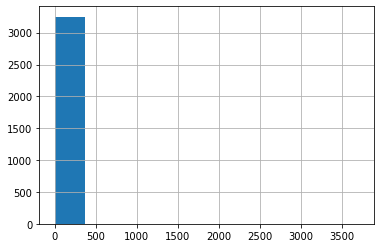

In [19]:
tweet_df["favorite_count"].hist() # create a histogram show the favorite count